#### Generate Fixed Matrix A

In [100]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

A = np.zeros(shape=(3,2))
mu, sigma = 0, 0.1 # mean and standard deviation
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        A[i][j] = np.random.normal(mu, sigma, 1)
print("Matrix A:")
print(A)
print("Rank of Matrix A: ", np.linalg.matrix_rank(A))

Matrix A:
[[-0.11989701  0.06587194]
 [ 0.04922076 -0.11681148]
 [ 0.09275004  0.06262534]]
Rank of Matrix A:  2


#### Generate Dataset #1 using fixed matrix A and a random vector v

In [101]:
N = 500
v = np.zeros(shape=(2,1))
X = np.zeros(shape=(3,N))
x = np.zeros(shape=(3,1))
for i in range(N):
    v[0] = np.random.normal(mu, sigma, 1)
    v[1] = np.random.normal(mu, sigma, 1)
    x = np.matmul(A, v)
    X[0][i] = x[0]
    X[1][i] = x[1]
    X[2][i] = x[2]
print("Shape of Matrix X: ", X.shape)
print("Rank of Matrix X: ", np.linalg.matrix_rank(X))

Shape of Matrix X:  (3, 500)
Rank of Matrix X:  2


#### Calculate the SVD and Eigen Decomposition of matrix X
##### 1) the left singular vectors calculated from SVD are the eigenvectors of XXT 

In [102]:
u, s, vT = np.linalg.svd(X)
print("Matrix U: columns are the left singular vectors")
print(u)
XXT = np.matmul(X, X.transpose())
w, v = np.linalg.eig(XXT)
XTX = np.matmul(X.transpose(), X)
w2, v2 = np.linalg.eig(XTX)
print("Matrix v: columns are the eigenvectors")
print(v)

Matrix U: columns are the left singular vectors
[[-0.7674756  -0.14034923  0.62552642]
 [ 0.59429366 -0.52166859  0.61210859]
 [ 0.24040851  0.84152479  0.48377657]]
Matrix v: columns are the eigenvectors
[[-0.7674756   0.62552642 -0.14034923]
 [ 0.59429366  0.61210859 -0.52166859]
 [ 0.24040851  0.48377657  0.84152479]]


##### 2) The eigenvalues of XXT are the square of the singular value of X

In [103]:
print("the singular values")
print(s)
for i in range(3):
    if(w[i] < 0):
        w[i] = abs
    w[i] = math.sqrt(w[i])
print()
print("The square root of the eigenvalues of XX^T")
print(w)

the singular values
[  3.97534617e-01   2.67149560e-01   3.42305773e-17]

The square root of the eigenvalues of XX^T
[  3.97534617e-01   3.22619603e-09   2.67149560e-01]


##### 3) The Frobenius norm of X is equal to the sum of the squares of the singular values X

In [104]:
print("Frobenius norm:")
print(np.linalg.norm(X)**2)
print("Sum of squares of singular values:")
print(s[0]**2+s[1]**2+s[2]**2)

Frobenius norm:
0.229402659123
Sum of squares of singular values:
0.229402659123


Since the rank of X is two, there should only be two nonzero singular values of X. But in most cases this doesn't happen instead the numbers just get really close to zero this is because of floating point errors in python.

##### The left singular vectors of X is equal to the left singular vectors of A

In [105]:
u1, s1, v1 = np.linalg.svd(A)
print("The left singular vectors of A:")
print(u1)
print()
print("The left singular vectors of X:")
print(u)

The left singular vectors of A:
[[-0.7570172  -0.18878999  0.62552642]
 [ 0.62621341 -0.48288698  0.61210859]
 [ 0.18649858  0.85508977  0.48377657]]

The left singular vectors of X:
[[-0.7674756  -0.14034923  0.62552642]
 [ 0.59429366 -0.52166859  0.61210859]
 [ 0.24040851  0.84152479  0.48377657]]


### PCA of Dataset #1

1) Even though we can have up to three principal components, two principal components should be enough to capture all variation in the data because of the way matrix X was generated. The covariance matrix of the data matrix (AV) has two non-negative values on the diagonal. So we know that there will be two non-negative singular values which is enough to capture the variation of the data.

#### 2) Mean Centering
$E[x_{1}]=E[x_{2}])=E[x_{3}])=0$ because the each of the data was drawn from a Guassian Distribution with mean 0 and variance 1: $Av_k$ and the expected value of $E[Av_k]=0$ for $k=1,2,3$.
Now calculate the mean vector of X:

In [193]:
meanVector = np.zeros(shape=(3,1))
meanVector = X.mean(1)
print("The mean vector of matrix X:")
print(meanVector)

The mean vector of matrix X:
[-3.93654985 -2.73304394  1.85790499]


In [107]:
print("The top two eigenvalues of", w, " are: ")
eigenvalue1 = w[0]
eigenvalue1Index = 0
eigenvalue2 = w[1]
eigenvalue2Index = 1
for i in range(2, w.shape[0]):
    if(eigenvalue1 > eigenvalue2):
        if(w[i] > eigenvalue2):
            eigenvalue2 = w[i]
            eigenvalue2Index = i
    else:
        if(w[i] > eigenvalue1):
            eigenvalue1 = w[i]
            eigenvalue1Index = i
print(eigenvalue1)
print(eigenvalue2)

The top two eigenvalues of [  3.97534617e-01   3.22619603e-09   2.67149560e-01]  are: 
0.397534617195
0.267149559713


The top 2 principal components are found by finding the top 2 eigenvalues and extracting those corresponding eigenvectors:

In [108]:
U = np.zeros(shape=(3,2))
U[:,0]=v[:,eigenvalue1Index]
U[:,1]=v[:,eigenvalue2Index]
print(U)

[[-0.7674756  -0.14034923]
 [ 0.59429366 -0.52166859]
 [ 0.24040851  0.84152479]]


#### 4) Compute feature vector $\widetilde{X}$ from X by projecting data onto the top two principal components of X


In [109]:
xtilda = np.matmul(U.transpose(), X)
print("Feature vector x tilda:")
print()
print(xtilda)

Feature vector x tilda:

[[  1.96045574e-03  -8.85419633e-04   2.86655668e-02  -3.14302385e-02
   -8.20481137e-03  -2.35890761e-02  -5.76948331e-03   9.21134035e-03
   -3.64705563e-02   2.93127222e-02  -4.01847863e-02   9.09042362e-03
    6.89771814e-03  -2.17787342e-03  -2.18094036e-02   1.30979139e-02
   -1.32850584e-02  -2.54185608e-02   1.62360711e-02   3.47939594e-02
    2.15137022e-02  -7.97210863e-03   9.23706854e-03   2.80661329e-04
    3.18892512e-02  -1.22919674e-04  -1.97643227e-02   3.05760870e-02
    6.02206409e-03   1.14126500e-02  -2.18847968e-03  -2.71065936e-02
    1.23030454e-02   1.55863021e-03   4.94128986e-02   8.39517912e-03
   -2.04918799e-03   2.20622010e-02  -3.41820631e-03  -1.96655789e-02
    8.83027820e-03   1.35216166e-02  -8.06322730e-03   9.38136177e-03
   -2.37604821e-02   2.53580461e-02  -9.64153639e-03  -1.53359417e-02
    4.13167257e-03   2.60611188e-02   5.49381344e-03  -1.02236431e-02
    6.82740072e-03  -2.07155518e-02  -1.50201007e-02   1.06026684

##### Using $\widetilde{X}$ to reconstruct original data samples:

In [110]:
xhat = np.matmul(U, xtilda)
print()
print("approximation of original data samples x hat:")
print()
print(xhat)


approximation of original data samples x hat:

[[-0.0008406   0.00035093 -0.02055372 ..., -0.01601699  0.02029621
   0.00096952]
 [ 0.00363313 -0.00174763  0.02241196 ...,  0.02063968 -0.02394439
  -0.00305138]
 [-0.00351     0.00175748 -0.00178111 ..., -0.00540472  0.00405301
   0.00260722]]


##### Compute representation error. The error should be zero (or very close to it)

In [111]:
print(np.linalg.norm(xhat-X)**2)

3.0606684367e-32


#### 5) Compute feature vector $\widetilde{X}$ from X by projecting data onto the top principal component of X

In [112]:
if(eigenvalue1 >= eigenvalue2):
    u1 = U[:,0]
else:
    u1 = U[:,1]
xtilda = np.matmul(u1.transpose(), X)
print(xtilda)
xtilda = xtilda.reshape(1,500)
u1 = u1.reshape(3,1)

[  1.96045574e-03  -8.85419633e-04   2.86655668e-02  -3.14302385e-02
  -8.20481137e-03  -2.35890761e-02  -5.76948331e-03   9.21134035e-03
  -3.64705563e-02   2.93127222e-02  -4.01847863e-02   9.09042362e-03
   6.89771814e-03  -2.17787342e-03  -2.18094036e-02   1.30979139e-02
  -1.32850584e-02  -2.54185608e-02   1.62360711e-02   3.47939594e-02
   2.15137022e-02  -7.97210863e-03   9.23706854e-03   2.80661329e-04
   3.18892512e-02  -1.22919674e-04  -1.97643227e-02   3.05760870e-02
   6.02206409e-03   1.14126500e-02  -2.18847968e-03  -2.71065936e-02
   1.23030454e-02   1.55863021e-03   4.94128986e-02   8.39517912e-03
  -2.04918799e-03   2.20622010e-02  -3.41820631e-03  -1.96655789e-02
   8.83027820e-03   1.35216166e-02  -8.06322730e-03   9.38136177e-03
  -2.37604821e-02   2.53580461e-02  -9.64153639e-03  -1.53359417e-02
   4.13167257e-03   2.60611188e-02   5.49381344e-03  -1.02236431e-02
   6.82740072e-03  -2.07155518e-02  -1.50201007e-02   1.06026684e-02
   1.20383578e-02   1.78831490e-02

##### Using $\widetilde{X}$ to reconstruct the original data samples (an approximation):

In [113]:
xhat = np.matmul(u1, xtilda)
print(xhat)

[[-0.0015046   0.00067954 -0.02200012 ..., -0.01785098  0.02212822
   0.00148176]
 [ 0.00116509 -0.0005262   0.01703576 ...,  0.01382288 -0.01713496
  -0.0011474 ]
 [ 0.00047131 -0.00021286  0.00689145 ...,  0.00559174 -0.00693157
  -0.00046416]]


##### Compute representation error which should be equal to the square of the second-largest singular value of X

In [114]:
# Find the second-largest singular value of X
singValue1 = s[0]
singValue2 = s[1]
for i in range(2, w.shape[0]):
    if(singValue1 > singValue2):
        if(w[i] > singValue2):
            singValue2 = w[i]
            singValue2Index = i
    else:
        if(w[i] > eigenvalue1):
            singValue1 = w[i]
            singValue1Index = i
            
print("The representation error:")
print(np.linalg.norm(xhat-X)**2)
print()
print("The square of the second-largest singular value:")
print(singValue2**2)

The representation error:
0.0713688872547

The square of the second-largest singular value:
0.0713688872547


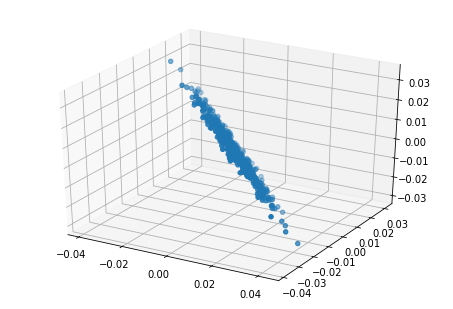

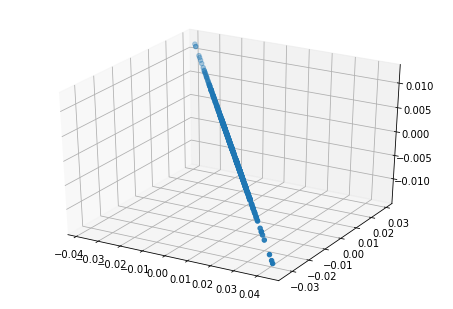

In [146]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[0], X[1], X[2])
fig2 = plt.figure()
ax2 = Axes3D(fig2)
ax2.scatter(xhat[0], xhat[1], xhat[2])
plt.show()

### Generation of Dataset #2

#### 1) generate fixed vector c

In [147]:
c = np.zeros(shape=(3,1))
mu, sigma = 0, 3 # mean and standard deviation
for i in range(c.shape[0]):
    c[i] = np.random.normal(mu, sigma, 1)
print("vector c:")
print(c)

vector c:
[[-3.93858831]
 [-2.72984681]
 [ 1.8564955 ]]


##### 2) generate 500 data samples with rank now 3

In [150]:
X = np.zeros(shape=(3, 500))
for i in range(500):
    v1 = np.zeros(shape=(2,1))
    for j in range(v1.shape[0]):
        v1[j] = np.random.normal(mu, 1, 1)
    Av1 = np.matmul(A, v1)
    xi = Av1 + c
    X[0][i] = xi[0]
    X[1][i] = xi[1]
    X[2][i] = xi[2]
print("rank of X: ", np.linalg.matrix_rank(X))

rank of X:  3


### PCA, Centering, and Dataset #2
##### The top two principal components without centering the data:

In [153]:
XXT = np.matmul(X, X.transpose())
w, v = np.linalg.eig(XXT)
eigenvalue1 = w[0]
eigenvalue1Index = 0
eigenvalue2 = w[1]
eigenvalue2Index = 1
for i in range(2, w.shape[0]):
    if(eigenvalue1 > eigenvalue2):
        if(w[i] > eigenvalue2):
            eigenvalue2 = w[i]
            eigenvalue2Index = i
    else:
        if(w[i] > eigenvalue1):
            eigenvalue1 = w[i]
            eigenvalue1Index = i
            
U[:,0]=v[:,eigenvalue1Index]
U[:,1]=v[:,eigenvalue2Index]
print(U)

[[-0.76592953 -0.58130898]
 [-0.53150638  0.81286436]
 [ 0.36173599 -0.03648828]]


##### Reconstruct (approximate) original data samples from the PCA vectors:

In [157]:
UUT = np.matmul(U, U.transpose())
xhat = np.matmul(UUT, X)
print(xhat)

[[-3.91052978 -3.76621366 -4.00236692 ..., -3.7573714  -3.86875565
  -3.86868612]
 [-2.57834523 -2.74387144 -2.51543658 ..., -2.73948831 -2.68529222
  -2.81439239]
 [ 1.81227574  1.81205755  1.82326406 ...,  1.80832974  1.82730907
   1.86030314]]


##### Compute representation error which is no where close to zero:

In [162]:
print("Representation error between approximated data Xhat and original data X: ")
print(np.linalg.norm(xhat-X)**2)

Representation error between approximated data Xhat and original data X: 
3.14524795613


##### Center data matrix:

In [172]:
mean = X.mean(1)
centeredX = np.zeros(shape=(3, 500))
for i in range(500):
    centeredX[:,i] = X[:,i]-mean
print(centeredX)

[[-0.00575784  0.1425449  -0.09272477 ...,  0.1490955   0.04747694
   0.07007415]
 [ 0.12713482 -0.03493343  0.19426785 ..., -0.03253806  0.0301287
  -0.07943114]
 [-0.1534151  -0.14011127 -0.12590776 ..., -0.15161204 -0.09950898
   0.00989559]]


In [189]:
w, v = np.linalg.eig(XXT)
print(v)
print(w)
eigenvalue1 = w[0]
eigenvalue1Index = 0
eigenvalue2 = w[1]
eigenvalue2Index = 1
for i in range(2, w.shape[0]):
    if(eigenvalue1 > eigenvalue2):
        if(w[i] > eigenvalue2):
            eigenvalue2 = w[i]
            eigenvalue2Index = i
    else:
        if(w[i] > eigenvalue1):
            eigenvalue1 = w[i]
            eigenvalue1Index = i
U[:,0]=v[:,eigenvalue1Index]
U[:,1]=v[:,eigenvalue2Index]
print(U)

[[-0.76592953 -0.58130898  0.27464855]
 [-0.53150638  0.81286436  0.23822783]
 [ 0.36173599 -0.03648828  0.93156625]]
[  1.32140556e+04   1.43891651e+01   3.14524796e+00]
[[-0.76592953 -0.58130898]
 [-0.53150638  0.81286436]
 [ 0.36173599 -0.03648828]]


In [188]:
UUT = np.matmul(U, U.transpose())
mean = mean.reshape(1,3)
xhat = np.zeros(shape=(3, 500))
for i in range(500):
    xhat[:,i] = np.matmul(UUT, centeredX[:,i])+mean
print("Error: ", np.linalg.norm(xhat-X)**2)

Error:  3.14413306212


## Generation of Dataset #3

In [335]:
N = 500
X = np.zeros(shape=(3,N))
v = np.zeros(shape=(2,1))
n = np.zeros(shape=(3,1)) # noise
for i in range(N):
    v[0] = np.random.normal(0, 1, 1)
    v[1] = np.random.normal(0, 1, 1)
    Av = np.matmul(A, v)
    n[0] = np.random.normal(0, 0.01, 1)
    n[1] = np.random.normal(0, 0.01, 1)
    n[2] = np.random.normal(0, 0.01, 1)
    x = Av+n
    X[0][i] = x[0]
    X[1][i] = x[1]
    X[2][i] = x[2]

#### Normalize data

In [194]:
for i in range(X.shape[1]):
    X[j][i] = (X[j][i])/np.linalg.norm(X[j][i])
print("Rank of normalized matrix: ", np.linalg.matrix_rank(X))
u, s, vT = np.linalg.svd(X)
print("Singular Values of normalized matrix: ", s)

Rank of normalized matrix:  3
Singular Values of normalized matrix:  [ 99.92182523   2.01128555   0.72774423]


### PCA Denoising of Dataset #3

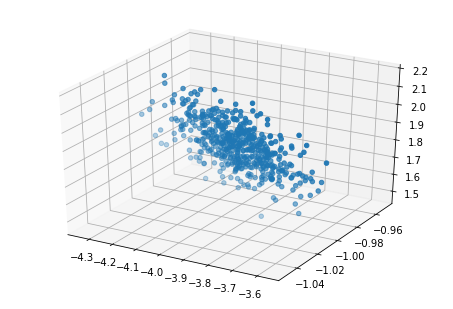

In [195]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[0], X[1], X[2])
plt.show()

#### Denoise Data

In [201]:
XXT = np.matmul(X, X.transpose())
w, v = np.linalg.eig(XXT)
eigenvalue1 = w[0]
eigenvalue1Index = 0
eigenvalue2 = w[1]
eigenvalue2Index = 1
for i in range(2, w.shape[0]):
    if(eigenvalue1 > eigenvalue2):
        if(w[i] > eigenvalue2):
            eigenvalue2 = w[i]
            eigenvalue2Index = i
    else:
        if(w[i] > eigenvalue1):
            eigenvalue1 = w[i]
            eigenvalue1Index = i
            
U[:,0]=v[:,eigenvalue1Index]
U[:,1]=v[:,eigenvalue2Index]
print(U)
xtilda = np.matmul(U.transpose(), X)

[[-0.88139193 -0.41495154]
 [-0.2236668  -0.05434678]
 [ 0.41607864 -0.90821894]]


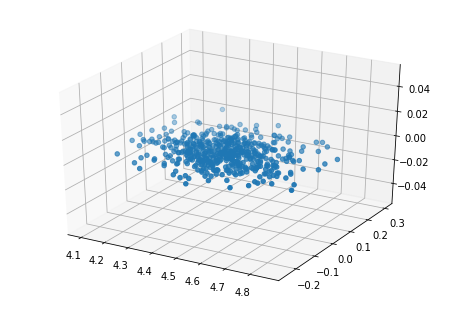

In [202]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xtilda[0], xtilda[1])
plt.show()